In [120]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from  sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [47]:
data=pd.read_csv("C:\\Users\\Sharry\\OneDrive\\Desktop\\krish data\\Car-PricePrediction-main\\car data.csv")

In [48]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [49]:
data.shape # rows and columns 

(301, 9)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [51]:
ds=data.dtypes[data.dtypes==object]
ds

Car_Name        object
Fuel_Type       object
Seller_Type     object
Transmission    object
dtype: object

In [52]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [53]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [54]:
data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [55]:
cars=np.unique(data["Car_Name"])
cars

array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200',
       'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F',
       'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme',
       'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour',
       'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk',
       'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus',
       'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
       'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine',
       'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
       'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma',
       'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390',
       'Mahindr

In [56]:
fule=np.unique(data["Fuel_Type"])
fule

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [57]:
cars

array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200',
       'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F',
       'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme',
       'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour',
       'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk',
       'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus',
       'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
       'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine',
       'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
       'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma',
       'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390',
       'Mahindr

In [58]:
transmission=np.unique(data["Transmission"])
transmission

array(['Automatic', 'Manual'], dtype=object)

In [59]:
print(data["Transmission"].value_counts())
print("-"*75)  # for doted lines 
print(data["Fuel_Type"].value_counts())
print("-"*75)
print(data["Seller_Type"].value_counts())
print("-"*75)



Manual       261
Automatic     40
Name: Transmission, dtype: int64
---------------------------------------------------------------------------
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
---------------------------------------------------------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
---------------------------------------------------------------------------


In [68]:
data["Owner"].unique()

array([0, 1, 3], dtype=int64)

In [69]:
data.drop(["Car_Name"], axis=1 ,inplace=True)

KeyError: "['Car_Name'] not found in axis"

In [ ]:
data.head()

In [ ]:
data["current"]=2021
data

In [ ]:
data["total years"]=data["current"]-data["Year"]


In [ ]:
data

In [70]:
data=data.drop(["Year","current"], axis =1)

KeyError: "['Year' 'current'] not found in axis"

In [71]:
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,total years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [72]:
datat=pd.get_dummies(data[["Fuel_Type" ,"Seller_Type","Transmission"]])

In [73]:
data.drop(["Fuel_Type" ,"Seller_Type","Transmission"],axis=1,inplace=True)

In [74]:
data=pd.concat([data,datat],axis=1)
data

,Selling_Price,Present_Price,Kms_Driven,Owner,total years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,6,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,12,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,4,0,1,0,1,0,0,1


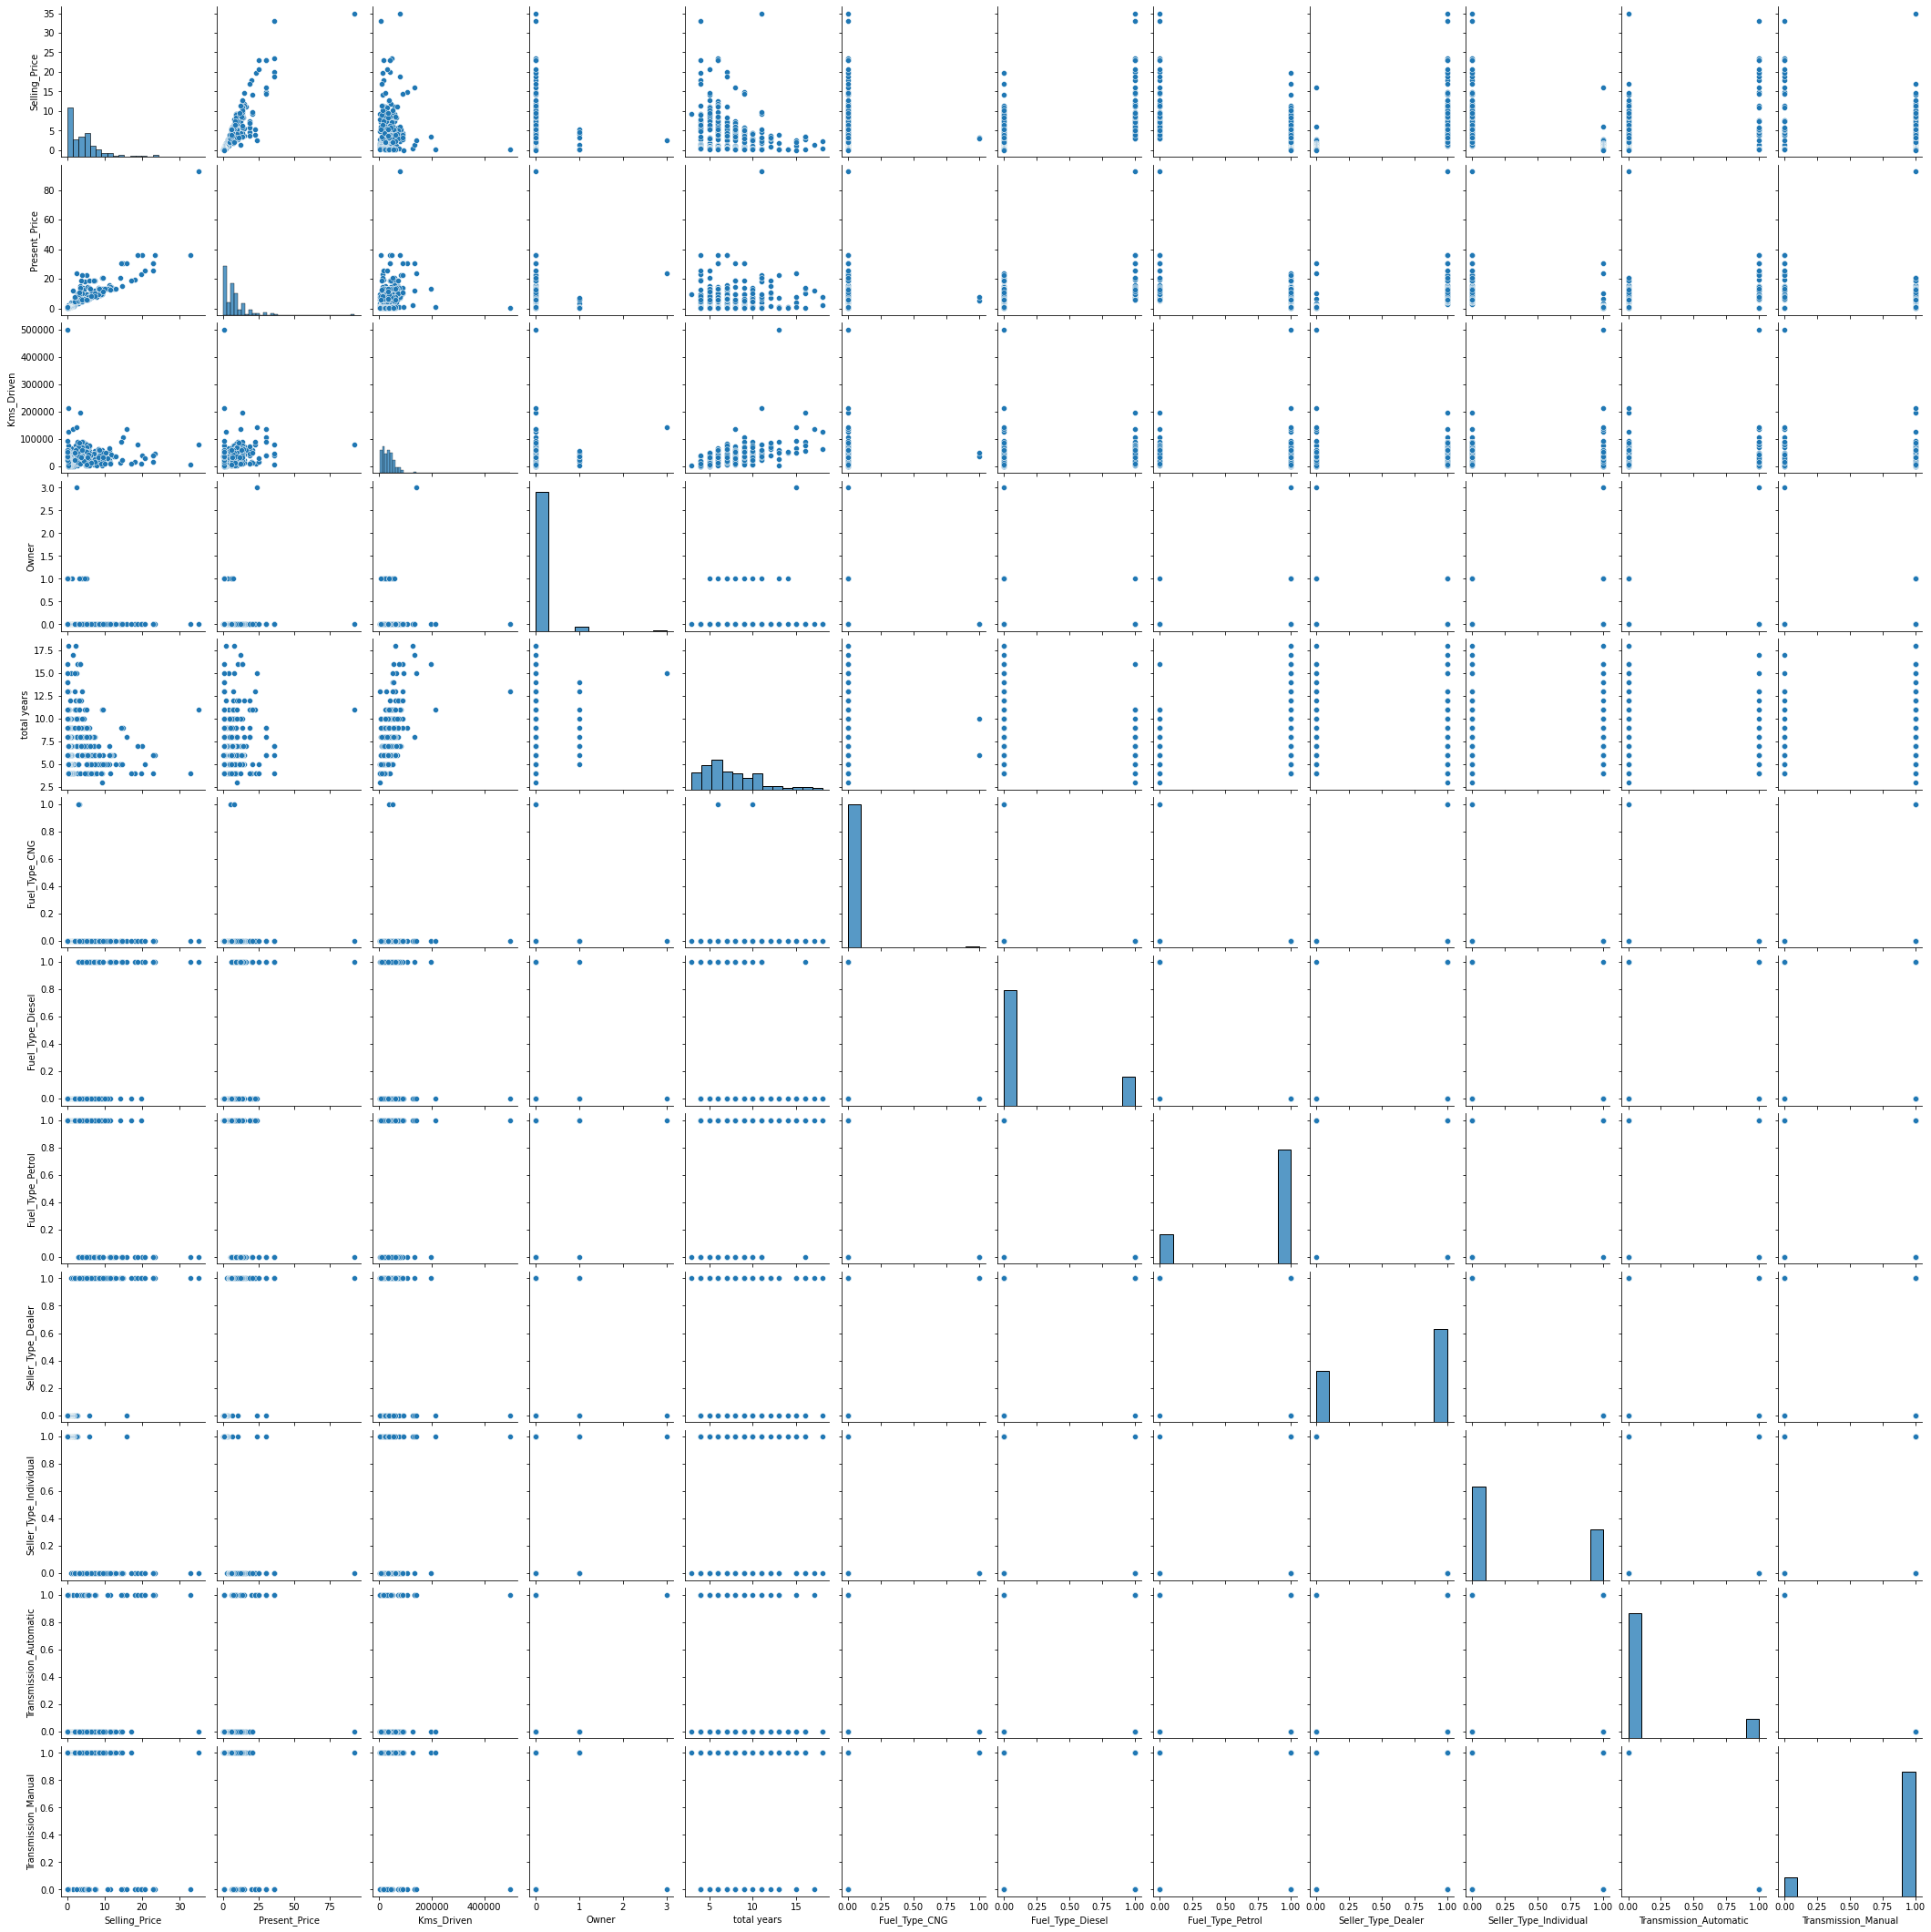

In [75]:
sns.pairplot(data=data)

<AxesSubplot:>

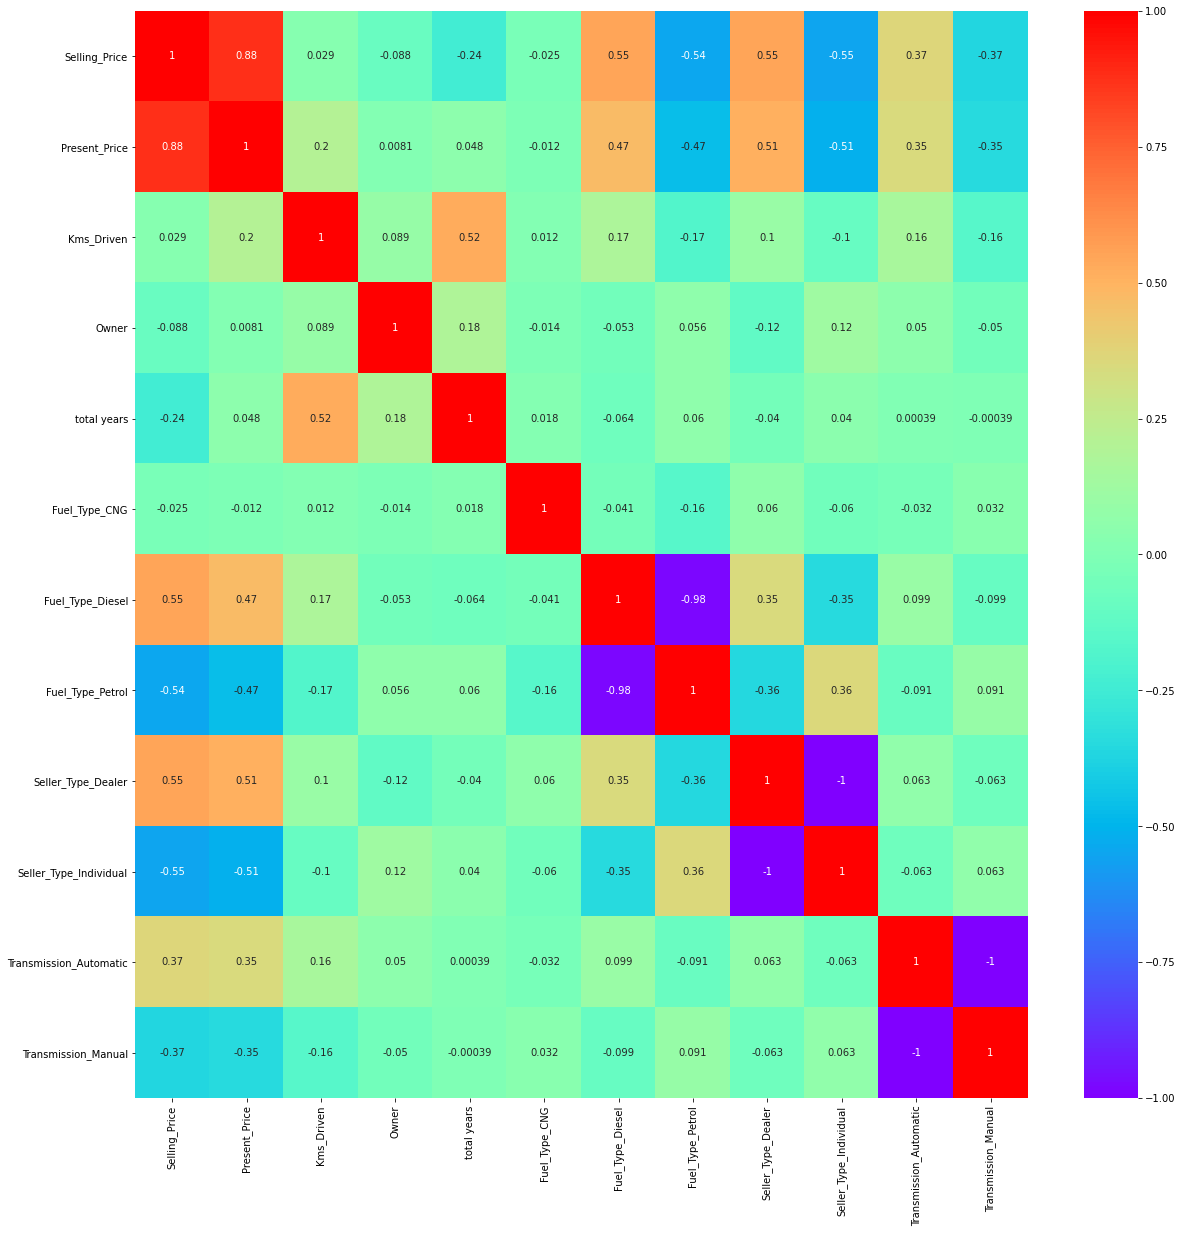

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap="rainbow",annot = True)

In [77]:
data

,Selling_Price,Present_Price,Kms_Driven,Owner,total years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,6,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,12,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,4,0,1,0,1,0,0,1


In [78]:
x= data.drop(["Selling_Price"], axis =1)
y=data["Selling_Price"]

In [79]:
x.head()

,Present_Price,Kms_Driven,Owner,total years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,7,0,0,1,1,0,0,1
1,9.54,43000,0,8,0,1,0,1,0,0,1
2,9.85,6900,0,4,0,0,1,1,0,0,1
3,4.15,5200,0,10,0,0,1,1,0,0,1
4,6.87,42450,0,7,0,1,0,1,0,0,1


In [163]:
x

,Present_Price,Kms_Driven,Owner,total years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,7,0,0,1,1,0,0,1
1,9.54,43000,0,8,0,1,0,1,0,0,1
2,9.85,6900,0,4,0,0,1,1,0,0,1
3,4.15,5200,0,10,0,0,1,1,0,0,1
4,6.87,42450,0,7,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,0,1,0,1,0,0,1
297,5.90,60000,0,6,0,0,1,1,0,0,1
298,11.00,87934,0,12,0,0,1,1,0,0,1
299,12.50,9000,0,4,0,1,0,1,0,0,1


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)


In [146]:
rd=RandomForestRegressor(random_state=0, n_estimators=125)

In [147]:
rd.fit(X_train,y_train)

RandomForestRegressor(n_estimators=125, random_state=0)

In [154]:
y_train_pr=rd.predict(X_test)

In [155]:
y_train_pr

array([ 7.1764 ,  0.47608,  4.6452 ,  8.74296, 13.5852 ,  5.2024 ,
        3.214  ,  0.44936,  3.9128 ,  4.5556 ,  3.028  ,  0.77296,
        4.7892 ,  7.35568,  7.72552, 13.1184 ,  6.6096 ,  3.9936 ,
        0.46576,  1.5944 ,  3.2556 ,  4.8632 ,  4.964  , 10.03512,
        0.19144,  0.74528,  0.3008 ,  0.78824,  0.4604 ,  4.87144,
        2.6236 ,  5.9744 ,  0.48696,  7.68152,  3.4084 ,  1.162  ,
        5.5776 ,  5.298  ,  0.22448,  9.1232 ,  8.16944, 21.3852 ,
        4.8072 ,  4.4636 ,  5.5904 , 11.48736,  0.24384,  0.7868 ,
        5.1972 ,  6.6692 ,  6.54752,  3.1416 ,  5.2444 , 22.418  ,
        1.17512,  1.14584,  0.38232,  2.6564 ,  3.568  ,  2.49728,
        4.34984,  6.0312 ,  3.0536 , 22.306  ,  4.4464 ,  5.836  ,
       10.9132 ,  5.56864,  0.44664,  3.024  ,  2.8664 ,  2.9812 ,
        0.46392,  5.4512 ,  0.49072,  4.9432 ,  0.4328 ,  9.56144,
        1.0916 ,  2.5932 ,  0.46312, 12.57264,  4.704  ,  4.774  ,
        5.9064 ,  1.088  ,  4.7188 ,  6.1352 ,  0.47952,  5.13

In [156]:
print("mean_squared_error",mean_squared_error(y_test,y_train_pr))
print("-"*55)
print("R2:-", r2_score(y_test,y_pr))

mean_squared_error 2.6245516200087895
-------------------------------------------------------
R2:- 0.9122401309666627


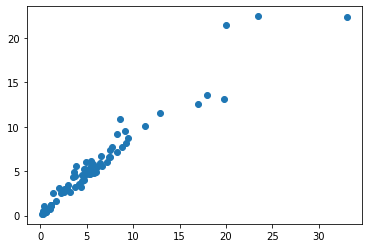

In [171]:
plt.scatter(y_test,y_train_pr)

In [177]:
y_train_pr=rd.predict(X_train)

In [178]:
y_train_pr

array([ 5.6488 ,  8.87296,  1.4924 ,  5.0048 ,  0.216  ,  0.51912,
        0.45352,  1.5192 ,  2.75168,  3.2112 ,  3.3584 ,  0.47576,
        5.2616 ,  1.0124 ,  0.8532 ,  5.15112,  2.9508 ,  6.7444 ,
        3.1504 , 10.15304,  3.17   ,  0.46344,  0.45064,  6.0288 ,
       11.45824,  0.67528,  7.45832,  7.1004 ,  0.51472,  2.27232,
        1.1588 ,  4.8816 ,  7.3952 ,  0.402  ,  7.3188 ,  4.4872 ,
        4.1404 ,  1.19936,  5.0972 ,  3.1416 ,  4.4864 , 20.53816,
        0.35888,  4.7808 ,  8.9232 ,  0.59832,  0.14552,  0.50368,
        5.1    ,  5.826  ,  0.24816,  5.8892 ,  1.17448,  0.1704 ,
        2.6812 ,  0.44984,  0.96848,  2.9448 ,  3.1752 ,  2.10984,
        6.33312,  0.27536,  2.7888 ,  9.72856,  3.7912 ,  8.23232,
       13.55632, 22.756  ,  8.04168, 10.6724 ,  1.4108 ,  0.33264,
       28.0312 ,  2.8452 ,  0.31088,  4.1132 ,  2.5948 ,  2.2984 ,
        0.4592 , 15.3328 ,  2.9984 ,  8.8864 ,  1.054  ,  4.1444 ,
       18.9384 ,  0.17432,  4.9468 ,  0.7176 ,  3.558  ,  7.12

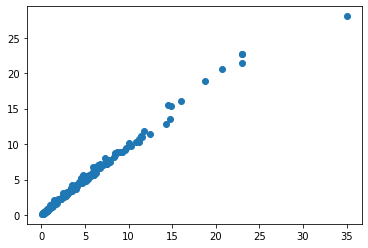

In [179]:
plt.scatter(y_train,y_train_pr)

In [180]:
print(r2_score(y_train,y_train_pr))

0.9864276773711413


# with Linear Regression 

In [203]:
from sklearn.linear_model import LinearRegression
regg=LinearRegression()

In [204]:
regg.fit( X_train  , y_train)

LinearRegression()

In [205]:
yprd=regg.predict(X_test)

In [207]:
print(r2_score(y_test,yprd))

0.8517983059778264


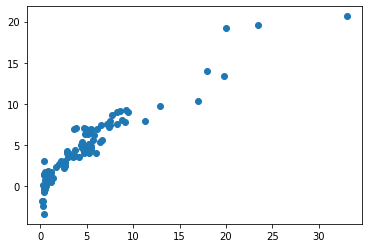

In [208]:
plt.scatter(y_test,yprd)

In [209]:
yprdtrain=regg.predict(X_train)

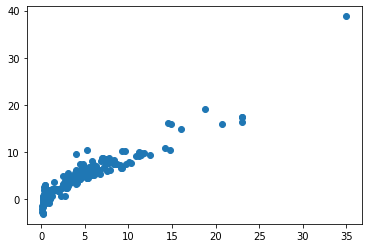

In [210]:
plt.scatter(y_train,yprdtrain)

In [215]:
print("mean_squared_error:-",mean_squared_error(y_train,yprdtrain))
print("R2:-", r2_score(y_train,yprdtrain))

mean_squared_error:- 2.556983351092275
R2:- 0.8926207626208047
